In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(42)

# Portfolio Planner

In this activity, you will use the iexfinance api to grab historical data for a 60/40 portfolio using `SPY` to represent the stock portion and `AGG` to represent the bonds.

In [3]:
from iexfinance.stocks import get_historical_data
import iexfinance as iex

# Data Collection

In this step, you will need to use the IEX api to fetch closing prices for the `SPY` and `AGG` tickers. Save the results as a pandas DataFrame

In [4]:
list_of_tickers = ["SPY", "AGG"]
# YOUR CODE HERE

# Monte Carlo Simulation

In this step, you will run Monte Carlo Simulations for your portfolio to model portfolio performance at different retirement ages. 

Complete the following steps:
1. Calculate the daily returns for the SPY and AGG closing prices.
2. Calculate volatility for both the SPY and AGG closing prices.
3. Find the last day's closing price for both stocks and save those as variables.
4. Run a Monte Carlo Simulation of at least 500 iterations and generate at least 30 years of closing prices

### HINTS:
There are 252 trading days per year, so the number of records to generate for each Monte Carlo run will be 252 days * 30 years

In [6]:
# Calculate the daily roi for the stocks
# YOUR CODE HERE
end_date = datetime.now()
start_date = end_date + timedelta(-365)

portfolio = get_historical_data(list_of_tickers, start_date, end_date, output_format='pandas')
portfolio.head()

SPY                                        AGG                  \
              open    high     low   close     volume    open    high     low   
date                                                                            
2019-01-22  264.82  265.06  261.06  262.86  115531183  106.44  106.62  106.44   
2019-01-23  264.01  264.79  260.66  263.41   86030287  106.38  106.59  106.37   
2019-01-24  263.21  264.20  262.08  263.55   59204139  106.72  106.84  106.67   
2019-01-25  265.61  266.70  263.66  265.78   96883358  106.64  106.70  106.56   
2019-01-28  263.39  263.83  261.79  263.76   85613655  106.62  106.75  106.58   

                             
             close   volume  
date                         
2019-01-22  106.44  6823956  
2019-01-23  106.55  3222846  
2019-01-24  106.73  7308898  
2019-01-25  106.68  3469453  
2019-01-28  106.62  7365747

In [7]:
portfolio.drop(columns=['open', 'high', 'low', 'volume'], level=1, inplace=True)
portfolio.head()

,SPY,AGG
,close,close
date,,
2019-01-22,262.86,106.44
2019-01-23,263.41,106.55
2019-01-24,263.55,106.73
2019-01-25,265.78,106.68
2019-01-28,263.76,106.62


In [9]:
# Calculate volatility
# YOUR CODE HERE
daily_returns = portfolio.pct_change()
daily_returns.head()

avg_daily_returns_spy = daily_returns.mean()['SPY']['close']
avg_daily_returns_agg = daily_returns.mean()['AGG']['close']

volatility_spy = daily_returns.std()['SPY']['close']
volatility_agg = daily_returns.std()['AGG']['close']

In [10]:
# Save the last day's closing price
# YOUR CODE HERE
spy_last_price = portfolio['SPY']['close'][-1]
agg_last_price = portfolio['AGG']['close'][-1]

In [11]:
# Setup the Monte Carlo Parameters
number_simulations = 500
number_records = 252 * 30
monte_carlo = pd.DataFrame()

In [13]:
# Run the Monte Carlo Simulation
simulated_price_df = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

for x in range(number_simulations):

    # YOUR CODE HERE
    simulated_spy_prices = [spy_last_price]
    simulated_agg_prices = [agg_last_price]
    
    for i in range(number_records):
        
        # Calculate the simulated price using the last price within the list
        simulated_spy_price = simulated_spy_prices[-1] * (1 + np.random.normal(avg_daily_returns_spy, volatility_spy))
        simulated_agg_price = simulated_agg_prices[-1] * (1 + np.random.normal(avg_daily_returns_agg, volatility_agg))
        
        # Append the simulated price to the list
        simulated_spy_prices.append(simulated_spy_price)
        simulated_agg_prices.append(simulated_agg_price)
    
    # Append a simulated prices of each simulation to DataFrame
    simulated_price_df["SPY prices"] = pd.Series(simulated_spy_prices)
    simulated_price_df["AGG prices"] = pd.Series(simulated_agg_prices)
    
    simulated_daily_returns = simulated_price_df.pct_change()
    
    weights = [0.60, 0.40]
    
    portfolio_daily_returns = simulated_daily_returns.dot(weights)
    
    portfolio_cumulative_returns[x] = (1 + portfolio_daily_returns.fillna(0)).cumprod()

portfolio_cumulative_returns.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996222,0.993929,0.999896,1.005468,1.006505,1.008854,0.996870,1.001856,0.999339,1.002761,...,0.996121,1.006918,1.000176,0.997978,1.003057,0.996650,0.994530,1.003012,0.997636,1.001466
2,1.000038,0.993478,0.999056,1.008655,0.998236,1.003838,0.987116,1.001268,1.007326,0.999477,...,1.003128,1.009988,1.001913,0.999475,1.000177,0.996370,0.995111,1.003086,1.001348,0.998932
3,1.000251,0.996933,0.993854,1.008206,1.001209,1.007665,0.981654,1.001242,1.015214,1.007172,...,1.005779,1.014524,1.003520,0.993478,0.999223,1.000070,1.000454,1.006429,1.000479,0.997302
4,1.003153,0.993831,0.999488,1.009844,0.996768,1.006748,0.979196,1.008793,1.006011,1.015876,...,1.004336,1.013382,1.008449,0.999416,0.996601,0.994983,1.001323,1.010826,1.003931,0.999934


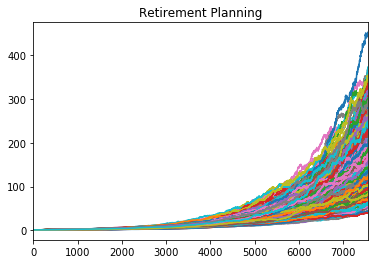

In [15]:
# Visualize the Simulation
# YOUR CODE HERE
portfolio_cumulative_returns.plot(legend=None, title="Retirement Planning")

In [16]:
# Select the last row for the cumulative returns (cumulative returns at 30 years)
# YOUR CODE HERE
ending_cumulative_returns = portfolio_cumulative_returns.iloc[-1, :]
ending_cumulative_returns.head()

0    143.860225
1    193.515796
2    202.454611
3    185.436230
4    152.304804
Name: 7560, dtype: float64

In [ ]:
# Select the last row for the cumulative returns (cumulative returns at 20 years)
# YOUR CODE HERE
ending_cumulative_returns_20_years = portfolio_cumulative_returns.iloc[]
ending_cumulative_returns.head()

In [17]:
# Display the 90% confidence interval for the ending returns
# YOUR CODE HERE
confidence_interval = ending_cumulative_returns.quantile(q=[0.05, 0.95])
confidence_interval

0.05     75.651312
0.95    280.071048
Name: 7560, dtype: float64

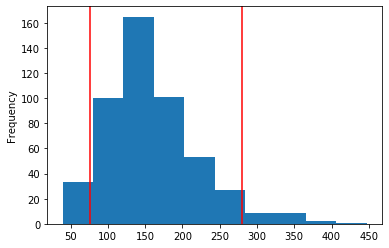

In [26]:
# Visualize the distribution of the ending returns
# YOUR CODE HERE
plt.figure();
ending_cumulative_returns.plot(kind='hist', bins=10)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')

---

# Retirement Analysis

In this section, you will use the monte carlo model to answer the following retirement planning questions:

1. What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?
2. Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?
3. Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?
4. How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

### What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?

In [22]:
# YOUR CODE HERE
initial_investment = 20000

quantiles = ending_cumulative_returns.quantile(q=[0.10, 0.50, 0.90])

cumulative_pnl_lower_bound = initial_investment * quantiles.iloc[0]
cumulative_pnl_half_bound = initial_investment * quantiles.iloc[1]
cumulative_pnl_upper_bound = initial_investment * quantiles.iloc[2]

### Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?

In [30]:
# YOUR CODE HERE
investment_pnl_lower_bound = initial_investment + (initial_investment * quantiles.iloc[0])
investment_pnl_half_bound = initial_investment + (initial_investment * quantiles.iloc[1])
investment_pnl_upper_bound = initial_investment + (initial_investment * quantiles.iloc[2])

investment_income = [investment_pnl_lower_bound, investment_pnl_half_bound, investment_pnl_upper_bound]
investment_income

[1877651.0827897505, 2960857.993288653, 4772453.136497456]

### Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?

Note: This is effectively saying that 90% of the expected returns will be greater than the return at the 10th percentile, so this can help measure the uncertainty about having enough funds at retirement

In [27]:
# YOUR CODE HERE
amount_withdrawn = 20000 * 0.04 * 30
remaining_retirement_balance = cumulative_pnl_lower_bound - amount_withdrawn
projected_income = 7389 * 30
projected_income

221670

### How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

In [ ]:

# YOUR CODE HERE

### Optional Challenge

In this section, you will calculate and plot the cumulative returns for the median and 90% confidence intervals. This plot shows the expected cumulative returns for any given day between the first day and the last day of investment. 

In [ ]:
# YOUR CODE HERE